<a href="https://colab.research.google.com/github/Sofilab/Rainfall-analysis-Ethiopia/blob/main/Final1_rainfall_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('rainfall.csv')  # or use the raw GitHub URL in place of 'rainfall.csv'
df.head()  # Displays the first 5 rows of the dataset


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 21669: invalid continuation byte

In [ ]:
df = pd.read_csv('rainfall.csv', encoding='latin1')
df.head()


,Country,Region,Year,Month,Rainfall_mm
0,Kenya,Nairobi,2018,1,25.41
1,Kenya,Nairobi,2018,2,214.89
2,Kenya,Nairobi,2018,3,218.55
3,Kenya,Nairobi,2018,4,256.78
4,Kenya,Nairobi,2018,5,291.81


In [ ]:
df.head()        # Shows first 5 rows
df.info()        # Shows info about columns, data types, and missing values
df.describe()    # Shows summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      900 non-null    object 
 1   Region       900 non-null    object 
 2   Year         900 non-null    int64  
 3   Month        900 non-null    int64  
 4   Rainfall_mm  900 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 35.3+ KB


,Year,Month,Rainfall_mm
count,900.000,900.000000,900.000000
mean,2020.000,6.500000,202.686533
std,1.415,3.453972,116.450002
min,2018.000,1.000000,6.830000
25%,2019.000,3.750000,98.985000
50%,2020.000,6.500000,205.140000
75%,2021.000,9.250000,303.547500
max,2022.000,12.000000,399.890000


In [ ]:
yearly_country_avg = df.groupby(['Country', 'Year'])['Rainfall'].mean().reset_index()


KeyError: 'Column not found: Rainfall'

In [ ]:
df.columns


Index(['Country', 'Region', 'Year', 'Month', 'Rainfall_mm'], dtype='object')

In [ ]:
yearly_country_avg = df.groupby(['Country', 'Year'])['Rainfall_mm'].mean().reset_index()


In [ ]:
yearly_country_avg = df.groupby(['Country', 'Year'])['Rainfall_mm'].mean().reset_index()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


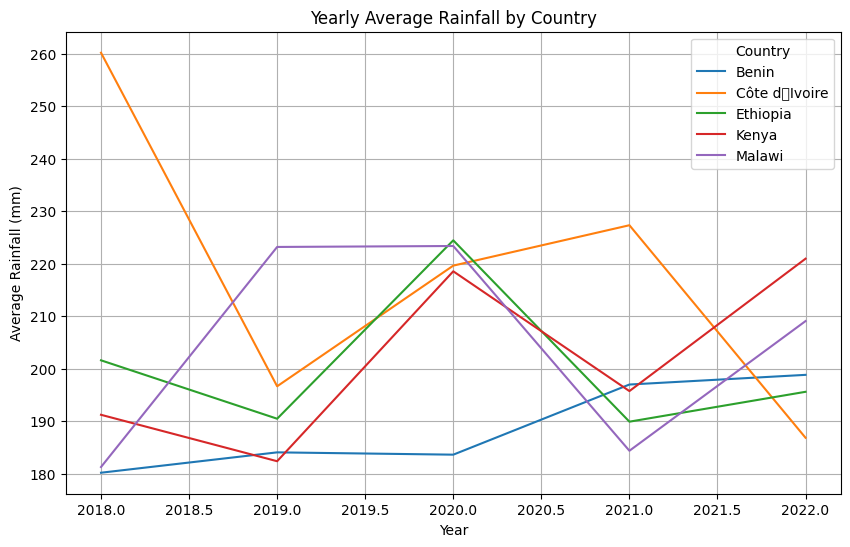

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_country_avg, x='Year', y='Rainfall_mm', hue='Country')
plt.title('Yearly Average Rainfall by Country')
plt.ylabel('Average Rainfall (mm)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


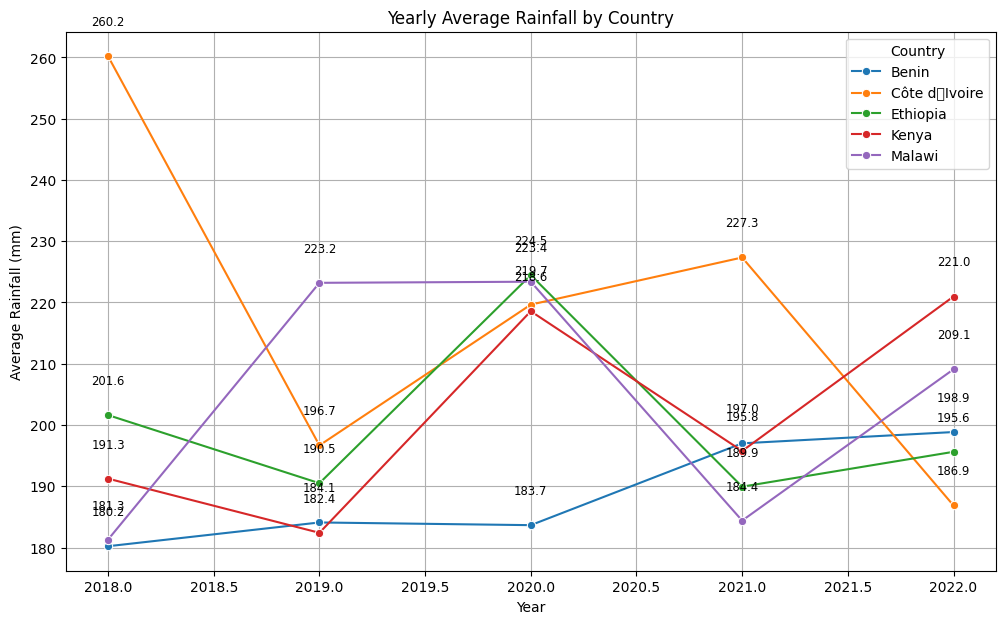

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.lineplot(data=yearly_country_avg, x='Year', y='Rainfall_mm', hue='Country', marker='o')

# Add data labels
for country in yearly_country_avg['Country'].unique():
    country_data = yearly_country_avg[yearly_country_avg['Country'] == country]
    for i, row in country_data.iterrows():
        plt.text(row['Year'], row['Rainfall_mm'] + 5,  # +5 to raise label a bit above the point
                 f"{row['Rainfall_mm']:.1f}",
                 horizontalalignment='center', size='small', color='black')

plt.title('Yearly Average Rainfall by Country')
plt.ylabel('Average Rainfall (mm)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


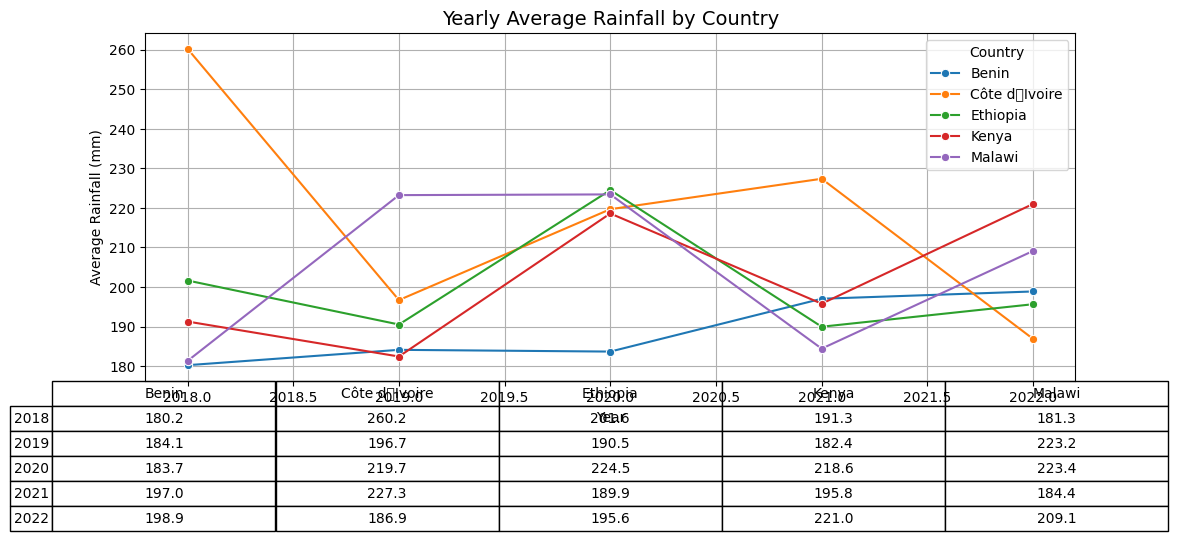

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot the data for a cleaner table (Years as index, Countries as columns)
rainfall_pivot = yearly_country_avg.pivot(index='Year', columns='Country', values='Rainfall_mm')

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot
sns.lineplot(data=yearly_country_avg, x='Year', y='Rainfall_mm', hue='Country', marker='o', ax=ax)

# Format plot
ax.set_title('Yearly Average Rainfall by Country', fontsize=14)
ax.set_ylabel('Average Rainfall (mm)')
ax.set_xlabel('Year')
ax.grid(True)

# Adjust layout to make room for table
plt.subplots_adjust(bottom=0.3)

# Add table below the plot
table = plt.table(cellText=rainfall_pivot.round(1).values,
                  rowLabels=rainfall_pivot.index,
                  colLabels=rainfall_pivot.columns,
                  cellLoc='center',
                  rowLoc='center',
                  loc='bottom')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


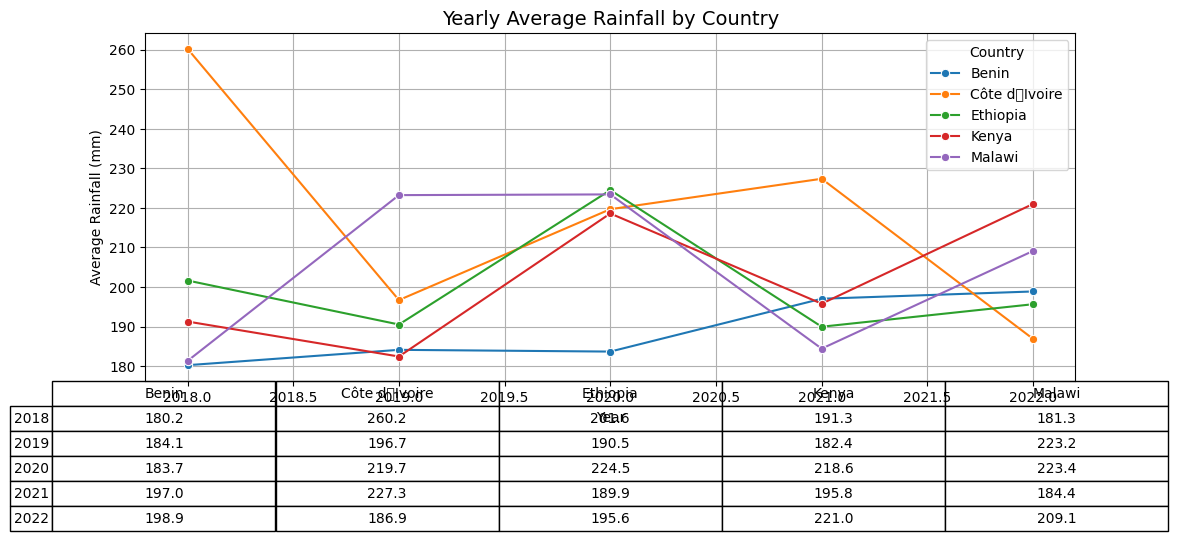

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot the data for a cleaner table (Years as index, Countries as columns)
rainfall_pivot = yearly_country_avg.pivot(index='Year', columns='Country', values='Rainfall_mm')

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot
sns.lineplot(data=yearly_country_avg, x='Year', y='Rainfall_mm', hue='Country', marker='o', ax=ax)

# Format plot
ax.set_title('Yearly Average Rainfall by Country', fontsize=14)
ax.set_ylabel('Average Rainfall (mm)')
ax.set_xlabel('Year')
ax.grid(True)

# Adjust layout to make room for table
plt.subplots_adjust(bottom=0.3)

# Add table below the plot
table = plt.table(cellText=rainfall_pivot.round(1).values,
                  rowLabels=rainfall_pivot.index,
                  colLabels=rainfall_pivot.columns,
                  cellLoc='center',
                  rowLoc='center',
                  loc='bottom')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


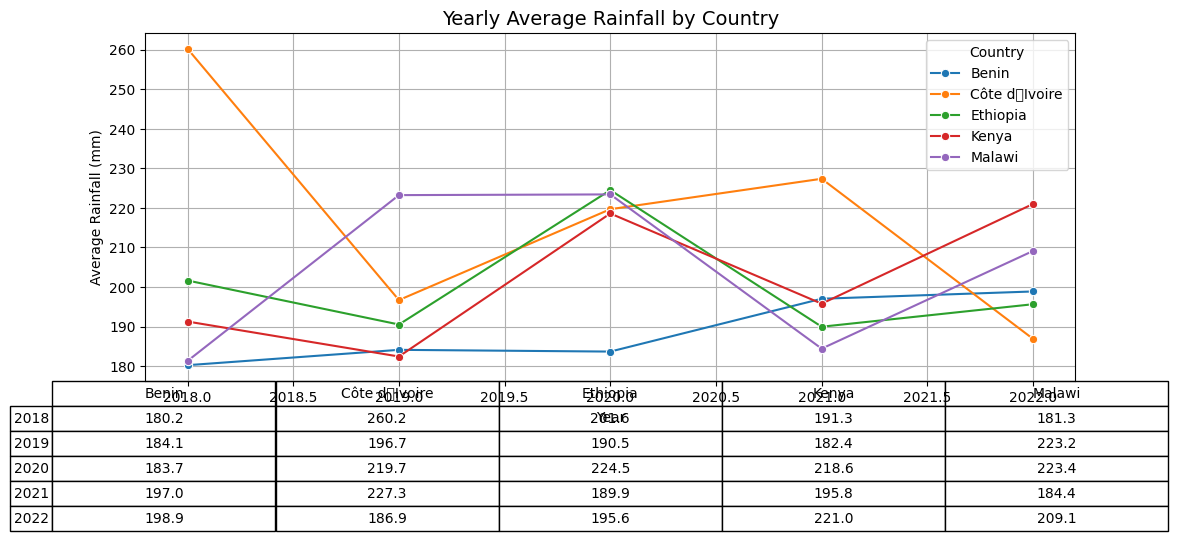

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot the data for a cleaner table (Years as index, Countries as columns)
rainfall_pivot = yearly_country_avg.pivot(index='Year', columns='Country', values='Rainfall_mm')

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot
sns.lineplot(data=yearly_country_avg, x='Year', y='Rainfall_mm', hue='Country', marker='o', ax=ax)

# Format plot
ax.set_title('Yearly Average Rainfall by Country', fontsize=14)
ax.set_ylabel('Average Rainfall (mm)')
ax.set_xlabel('Year')
ax.grid(True)

# Adjust layout to make room for table
plt.subplots_adjust(bottom=0.3)

# Add table below the plot
table = plt.table(cellText=rainfall_pivot.round(1).values,
                  rowLabels=rainfall_pivot.index,
                  colLabels=rainfall_pivot.columns,
                  cellLoc='center',
                  rowLoc='center',
                  loc='bottom')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


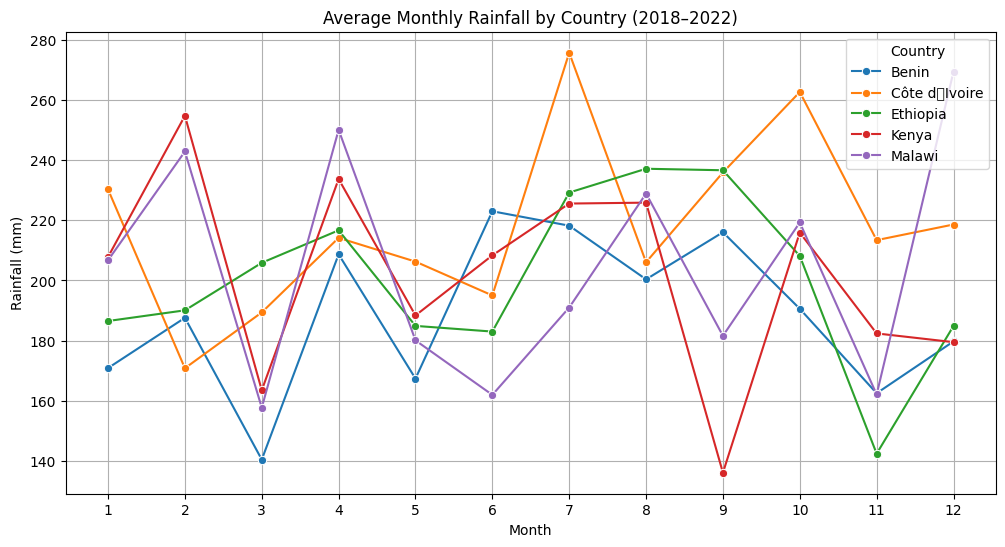

In [ ]:
# Monthly average rainfall by country
monthly_avg = df.groupby(['Country', 'Month'])['Rainfall_mm'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Rainfall_mm', hue='Country', marker='o')
plt.title('Average Monthly Rainfall by Country (2018–2022)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


/tmp/ipython-input-19-2252181550.py:35: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


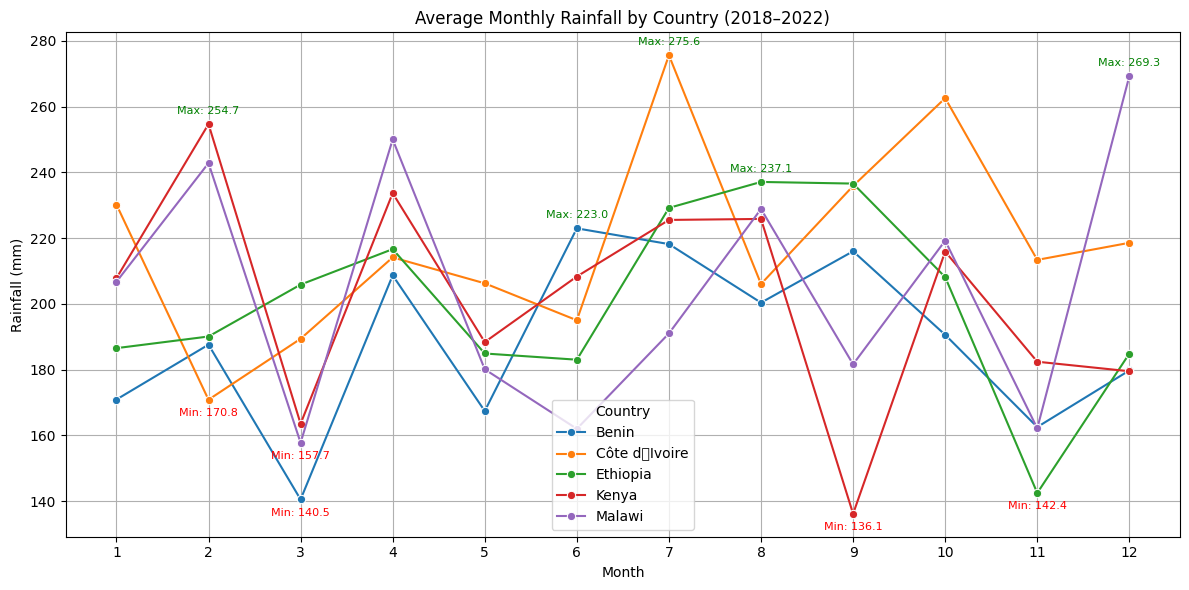

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Monthly average rainfall by country
monthly_avg = df.groupby(['Country', 'Month'])['Rainfall_mm'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Plot line chart
sns.lineplot(data=monthly_avg, x='Month', y='Rainfall_mm', hue='Country', marker='o')

# Loop through each country to annotate max and min
for country in monthly_avg['Country'].unique():
    country_data = monthly_avg[monthly_avg['Country'] == country]

    # Find max and min
    max_row = country_data.loc[country_data['Rainfall_mm'].idxmax()]
    min_row = country_data.loc[country_data['Rainfall_mm'].idxmin()]

    # Annotate max point
    plt.text(max_row['Month'], max_row['Rainfall_mm'] + 3,
             f"Max: {max_row['Rainfall_mm']:.1f}",
             ha='center', fontsize=8, color='green')

    # Annotate min point
    plt.text(min_row['Month'], min_row['Rainfall_mm'] - 5,
             f"Min: {min_row['Rainfall_mm']:.1f}",
             ha='center', fontsize=8, color='red')

plt.title('Average Monthly Rainfall by Country (2018–2022)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()
